In [3]:
import pandas as pd
import diffprivlib.models as dp
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data/adult_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.columns = [x.strip() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df[['education', 'education-num']].head(20)

,education,education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [9]:
df.drop(columns='education-num', inplace=True)

In [10]:
for col in df.select_dtypes(exclude='number').columns:
    print(col ,':', df[col].unique(), '\n')

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race : [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex : [' Male' ' Female'] 

native-country : [' United-States'

In [11]:
fix = []
for col in df.select_dtypes(exclude='number').columns:
    try:
        print(col , df[col].value_counts()[' ?'], '\n')
        fix.append(col)
    except:
        pass

workclass 1836 

occupation 1843 

native-country 583 



In [12]:
mapping = {' ?': 'Unknown'}
for col in fix:
    df[col] = df[col].map(lambda x: mapping[x] if x in mapping.keys() else x)

In [13]:
for col in fix:
    print(col , df[col].unique(), '\n')

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'Unknown' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' 'Unknown'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

native-country [' United-States' ' Cuba' ' Jamaica' ' India' 'Unknown' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands'] 



In [14]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
salary_map = {' <=50K': 1, ' >50K': 0}
df['salary'] = df['salary'].map(salary_map)
df['salary'].unique()

array([1, 0], dtype=int64)

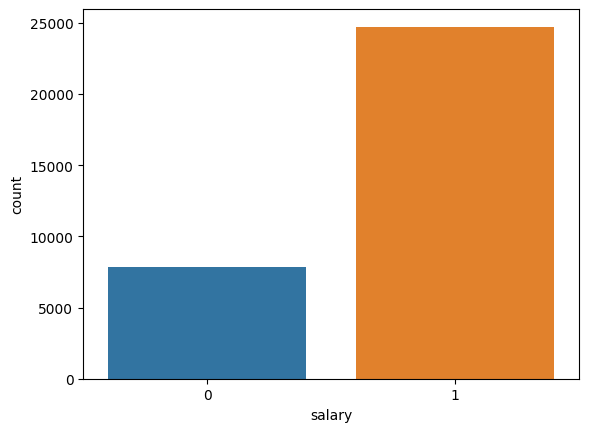

In [16]:
sns.countplot(x=df['salary'])
plt.show()

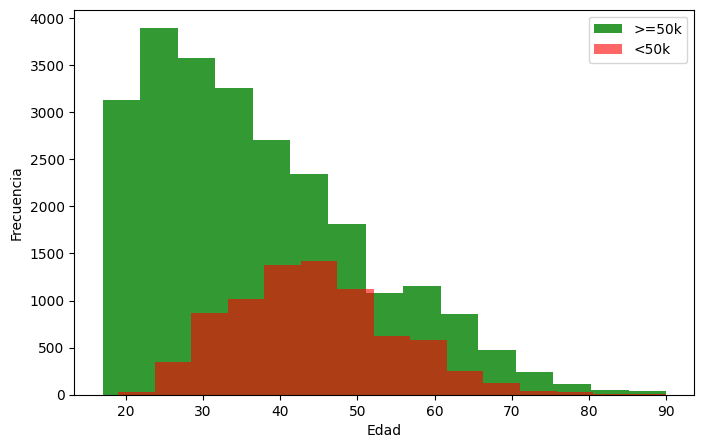

In [17]:
fig, ax = plt.subplots(1, figsize=(8,5))
ax.hist(data=df[df['salary'] == 1], x='age', color='g', alpha=0.8, label='>=50k', bins=15)
ax.hist(data=df[df['salary'] == 0], x='age', color='r', alpha=0.6, label='<50k', bins=15)
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.legend()
plt.show()

In [18]:
X = df.loc[:, df.columns !='salary']
X_cat = X.select_dtypes(exclude='number')
X_num = X.select_dtypes(include='number')

y = df.loc[:, df.columns == 'salary']


In [19]:
cat_transforms = [(OneHotEncoder(handle_unknown='ignore'), list(X_cat.columns))]
num_transforms = [(StandardScaler(), list(X_num.columns))]
transforms = cat_transforms + num_transforms
print(*transforms)

(OneHotEncoder(handle_unknown='ignore'), ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']) (StandardScaler(), ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'])


In [20]:
transformer = make_column_transformer(*transforms)

In [21]:
train_val_size = 0.8
test_size = 0.2

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state = 0)

train_size = 0.65
val_size = 0.15

split_train_ratio = (train_size / train_val_size)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=split_train_ratio, random_state=0)


In [22]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)

In [23]:
def evaluate(model, X, y_true):
    y_pred = model.predict_proba(X)[:, 1]
    accuracy = accuracy_score(y_true, y_pred >= 0.5)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, auc

def tune_logistic_regression(X_train, X_val, y_train, y_val, penalty_types, C_values, verbose=True):
    
    parameters = list()
    models = list()
    val_aucs = list()
    accuracy_list = list()
    
    for penalty in penalty_types:
        for C in C_values:
            lr = LogisticRegression(C=C, penalty=penalty, solver='liblinear')
            lr.fit(X_train, np.ravel(y_train))
            accuracy, auc  = evaluate(lr, X_val, y_val)
            accuracy_list.append(accuracy)
            parameters.append({'penalty': penalty, 'C': C})
            models.append(lr)
            val_aucs.append(auc)
            if verbose:
                print(f'Parameters: \tpenalty={penalty} \tC={C}')
                print(f'Validtion AUC: {auc}')
                print(f'Accuracy: {accuracy}\n')
                
    best_model_index = np.argmax(val_aucs)
    best_model = models[best_model_index]
    print(f'\nBest model parameters: {parameters[best_model_index]}')
    print(f'Best model AUC: {val_aucs[best_model_index]}\n')
    return best_model, parameters, models, val_aucs, accuracy_list

In [24]:
%%time
best_lr, parameters, models, val_aucs, accuracy_list = tune_logistic_regression(X_train, X_val,
                                                                 y_train, y_val,
                                                                 penalty_types=['l1', 'l2'],
                                                                 C_values=[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000],
                                                                verbose=True)

Parameters: 	penalty=l1 	C=0.001
Validtion AUC: 0.8094516605191249
Accuracy: 0.7651515151515151

Parameters: 	penalty=l1 	C=0.1
Validtion AUC: 0.90882958467959
Accuracy: 0.8509418509418509

Parameters: 	penalty=l1 	C=1
Validtion AUC: 0.9105883772196874
Accuracy: 0.8523751023751024

Parameters: 	penalty=l1 	C=10
Validtion AUC: 0.9104966477782924
Accuracy: 0.8527846027846028

Parameters: 	penalty=l1 	C=100
Validtion AUC: 0.9103452828191667
Accuracy: 0.852989352989353

Parameters: 	penalty=l1 	C=1000
Validtion AUC: 0.9103209278558186
Accuracy: 0.852989352989353

Parameters: 	penalty=l1 	C=10000
Validtion AUC: 0.9103191069239795
Accuracy: 0.852989352989353

Parameters: 	penalty=l1 	C=100000
Validtion AUC: 0.910315692676781
Accuracy: 0.852989352989353

Parameters: 	penalty=l2 	C=0.001
Validtion AUC: 0.8769225341453171
Accuracy: 0.8214578214578214

Parameters: 	penalty=l2 	C=0.1
Validtion AUC: 0.9095156207499736
Accuracy: 0.8509418509418509

Parameters: 	penalty=l2 	C=1
Validtion AUC: 0.9106

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [26]:
lr = LogisticRegression(C=1, penalty='l2', solver='liblinear')
lr.fit(X_train, np.ravel(y_train))

LogisticRegression(C=1, solver='liblinear')

In [27]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
y_pred = y_pred_proba >= 0.5

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Accuracy: 0.8472286196837095
Precision: 0.8783027965284474
Recall: 0.925986173241155
F1: 0.9015144016628724


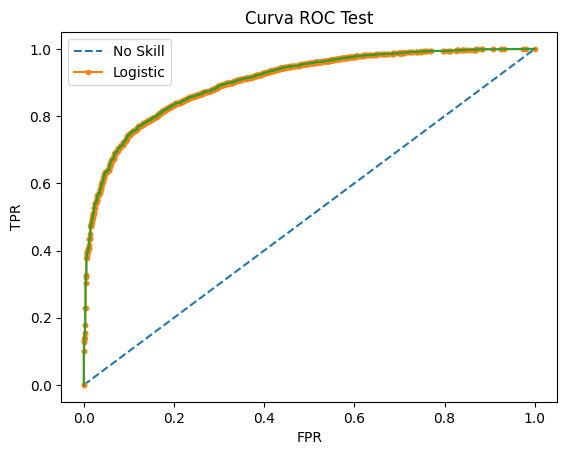

AUC Score: 0.9040074143858974


In [28]:
y_pred_proba = lr.predict_proba(X_test)[:,1]

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

fpr, tpr, t = roc_curve(y_test, y_pred_proba)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fpr,tpr)
plt.title('Curva ROC Test')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()

print(f'AUC Score: {roc_auc_score(y_test,y_pred_proba)}')

In [29]:
dlr = dp.LogisticRegression(C=1, n_jobs=4)

In [30]:
dlr.fit(X_train.toarray(), np.ravel(y_train))

LogisticRegression(C=1, accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
                   data_norm=14.196486509445666, n_jobs=4)

In [31]:
y_pred_proba = dlr.predict_proba(X_test.toarray())[:,1]
y_pred = y_pred_proba >= 0.5

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Accuracy: 0.6866267465069861
Precision: 0.7896114354741293
Recall: 0.7974786498576657
F1: 0.7935255437531614


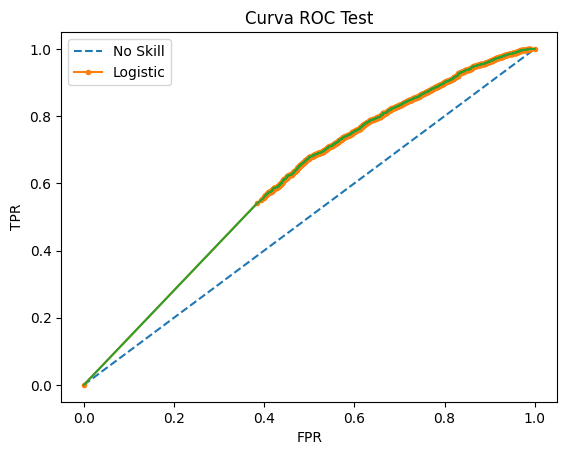

AUC Score: 0.6037405933803404


In [32]:
y_pred_proba = dlr.predict_proba(X_test.toarray())[:,1]

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

fpr, tpr, t = roc_curve(y_test, y_pred_proba)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fpr,tpr)
plt.title('Curva ROC Test')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()

print(f'AUC Score: {roc_auc_score(y_test,y_pred_proba)}')

# Taller sumativo.


- Averigüe más acerca de la privacidad diferencial. Luego, para

```python
epsilons = np.logspace(-3,1,500)
```

entrene un modelo de regresión logística con privacidad diferencial para valor de epsilon en ```epsilons```. Almacene el ```accuracy``` y ```roc_auc_score``` de cada modelo y luego genere un gráfico ```epsilon``` vs ```accuracy``` y ```epsilon``` vs ```roc_auc_score```. Reflexione a partir de lo que averiguó acerca de la privacidad diferencial: ¿Qué valor de epsilon considera adecuado para este problema? 

**Recomendación**: Puede averigüar más sobre privacidad diferencial en este documento: http://www.gautamkamath.com/CS860notes/lec3.pdf. Solo es necesario que lea las 3 primeras páginas.

## Último taller nadie se enoja.

**BONUS**: 1.2 puntos de bonus a repartir en talleres anteriores si realiza todo el proceso de este notebook con nuevos datos (que no hayan sido utilizados este semestre en taller). Es decir:

- Limpieza y preprocesamiento
- Transformación de columnas
- Entrenamiento de un modelo sin privacidad diferencial.
- Entrenamiento de un modelo de privacidad diferencial, realizando la búsqueda que se describe en el ejercicio anterior (probar epsilons en ```epsilons = np.logspace(-3,1,500)``` y graficar ```accuracys``` y ```roc_auc_score```. Reflexione a partir de lo que averiguó acerca de la privacidad diferencial: ¿Qué valor de epsilon considera adecuado para el problema que usted analizó? 

**Nota:** NO SE REVISARÁN DESARROLLOS PARCIALES DEL BONUS. Deben cumplirse los objetivos. Considere que obtener el punto de bonus también implica la nota máxima en este taller.

### Fecha de entrega: 20 de Junio, 23:59 hrs.



#### NO ES NECESARIO QUE DESARROLLE EL BONUS PARA OBTENER NOTA MÁXIMA EN ESTE TALLER.


In [33]:
epsilons = np.logspace(-3, 1, 500)

In [34]:
def Log_reg_dp(X_train, X_test, Y_train, Y_test, epsilons_list: list, verbose=True):

    acc_list = []
    auc_list = []
    sum = []

    for epsilon in epsilons_list:
        try:
            lr_dp = dp.LogisticRegression(epsilon=epsilon, n_jobs=4, randomstate=0)
            lr_dp.fit(X_train.toarray(), np.ravel(Y_train))
            accuracy, auc = evaluate(lr_dp, X_test, Y_test)
            acc_list.append(accuracy)
            auc_list.append(auc)
            sum.append(auc + accuracy)
            if verbose:
                print(f'Epsilon: {epsilon}')
                print(f'Validtion AUC: {auc}')
                print(f'Accuracy: {accuracy}\n')
        except:
            pass
    return acc_list, auc_list, sum

In [35]:
acc_list, auc_list, sum = Log_reg_dp(X_train, X_val, y_train, y_val, epsilons_list=epsilons, verbose=True)

Epsilon: 0.001
Validtion AUC: 0.346262366687873
Accuracy: 0.4975429975429975

Epsilon: 0.0010186289902446876
Validtion AUC: 0.34626817090811013
Accuracy: 0.4975429975429975

Epsilon: 0.0010376050197669117
Validtion AUC: 0.3462726094294679
Accuracy: 0.4975429975429975

Epsilon: 0.0010569345535579883
Validtion AUC: 0.3463933599720487
Accuracy: 0.4975429975429975

Epsilon: 0.0010766241770454933
Validtion AUC: 0.3463981399181264
Accuracy: 0.4975429975429975

Epsilon: 0.0010966805983368686
Validtion AUC: 0.3464018955900446
Accuracy: 0.4975429975429975

Epsilon: 0.0011171106505048242
Validtion AUC: 0.34652275994086523
Accuracy: 0.4975429975429975

Epsilon: 0.0011379212939153151
Validtion AUC: 0.34664260001752645
Accuracy: 0.4975429975429975

Epsilon: 0.0011591196185988858
Validtion AUC: 0.3466482904295237
Accuracy: 0.4975429975429975

Epsilon: 0.0011807128466661903
Validtion AUC: 0.34665568796512014
Accuracy: 0.4975429975429975

Epsilon: 0.001202708334768512
Validtion AUC: 0.3466600126782379

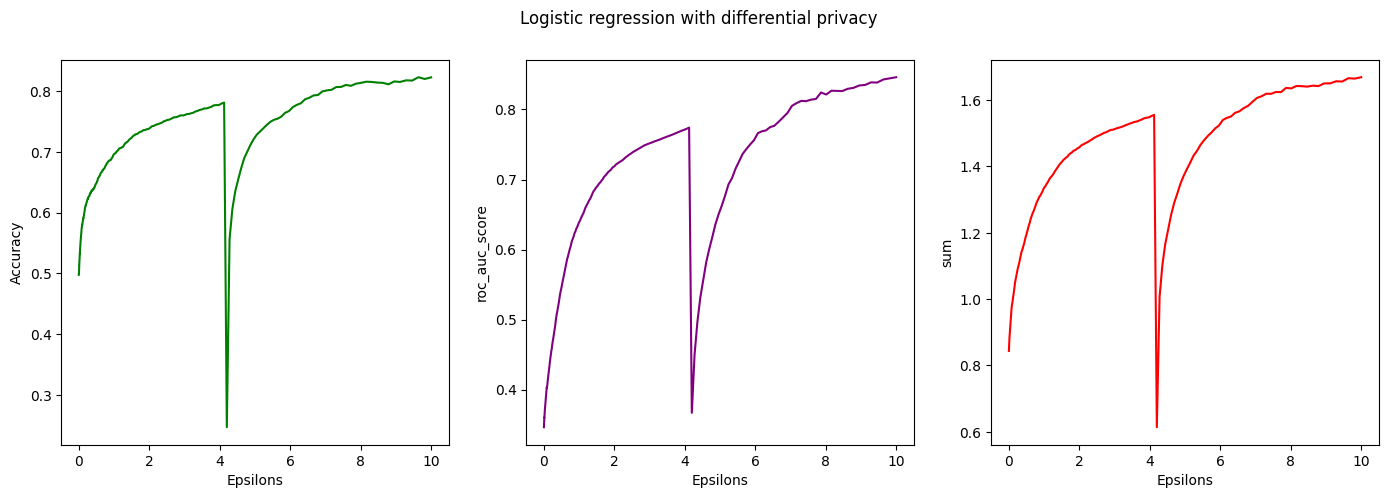

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
ax1.plot(epsilons, acc_list, color='green')
ax1.set_xlabel('Epsilons')
ax1.set_ylabel('Accuracy')

ax2.plot(epsilons, auc_list, color='purple')
ax2.set_xlabel('Epsilons')
ax2.set_ylabel('roc_auc_score')


ax3.plot(epsilons, sum, color='red')
ax3.set_xlabel('Epsilons')
ax3.set_ylabel('sum')
fig.suptitle('Logistic regression with differential privacy')
plt.show()

En el paper entregado se nos sugiere que los valores de épsilon que entrega una garantía de privacidad de nivel razonable varía entre 0.1 y 5, por lo que acotaremos los épsilons a este intervalo.

In [37]:
epsilons5 = [epsilon for epsilon in epsilons if epsilon <= 5]

In [38]:
acc_list, auc_list, sum = Log_reg_dp(X_train, X_val, y_train, y_val, epsilons_list=epsilons5, verbose=True)

Epsilon: 0.001
Validtion AUC: 0.346262366687873
Accuracy: 0.4975429975429975

Epsilon: 0.0010186289902446876
Validtion AUC: 0.34626817090811013
Accuracy: 0.4975429975429975

Epsilon: 0.0010376050197669117
Validtion AUC: 0.3462726094294679
Accuracy: 0.4975429975429975

Epsilon: 0.0010569345535579883
Validtion AUC: 0.3463933599720487
Accuracy: 0.4975429975429975

Epsilon: 0.0010766241770454933
Validtion AUC: 0.3463981399181264
Accuracy: 0.4975429975429975

Epsilon: 0.0010966805983368686
Validtion AUC: 0.3464018955900446
Accuracy: 0.4975429975429975

Epsilon: 0.0011171106505048242
Validtion AUC: 0.34652275994086523
Accuracy: 0.4975429975429975

Epsilon: 0.0011379212939153151
Validtion AUC: 0.34664260001752645
Accuracy: 0.4975429975429975

Epsilon: 0.0011591196185988858
Validtion AUC: 0.3466482904295237
Accuracy: 0.4975429975429975

Epsilon: 0.0011807128466661903
Validtion AUC: 0.34665568796512014
Accuracy: 0.4975429975429975

Epsilon: 0.001202708334768512
Validtion AUC: 0.3466600126782379

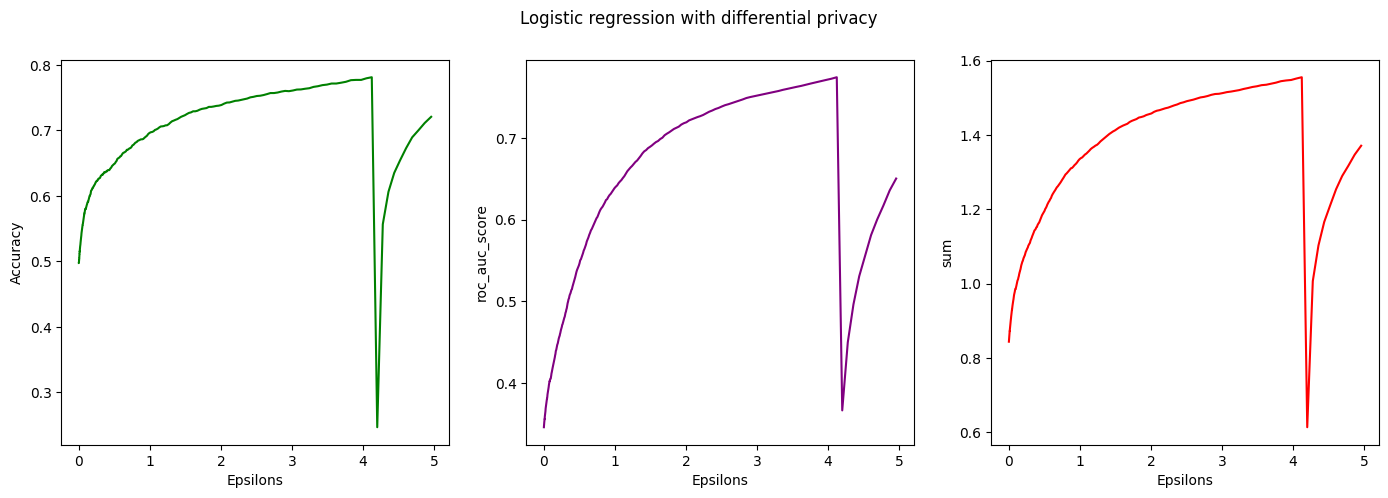

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
ax1.plot(epsilons5, acc_list, color='green')
ax1.set_xlabel('Epsilons')
ax1.set_ylabel('Accuracy')

ax2.plot(epsilons5, auc_list, color='purple')
ax2.set_xlabel('Epsilons')
ax2.set_ylabel('roc_auc_score')


ax3.plot(epsilons5, sum, color='red')
ax3.set_xlabel('Epsilons')
ax3.set_ylabel('sum')
fig.suptitle('Logistic regression with differential privacy')
plt.show()

In [40]:
i_max = sum.index(max(sum))
e_optimo = epsilons[i_max]
print(f'Epsilon optimo: {e_optimo}')
print(f'Acurracy de la Regresión Logistica {e_optimo}-Diferencialmente Privado: {acc_list[i_max]}')
print(f'AUC de la Regresión Logistica {e_optimo}-Diferencialmente Privado: {acc_list[i_max]}')

Epsilon optimo: 4.1231625910297485
Acurracy de la Regresión Logistica 4.1231625910297485-Diferencialmente Privado: 0.7811220311220312
AUC de la Regresión Logistica 4.1231625910297485-Diferencialmente Privado: 0.7811220311220312


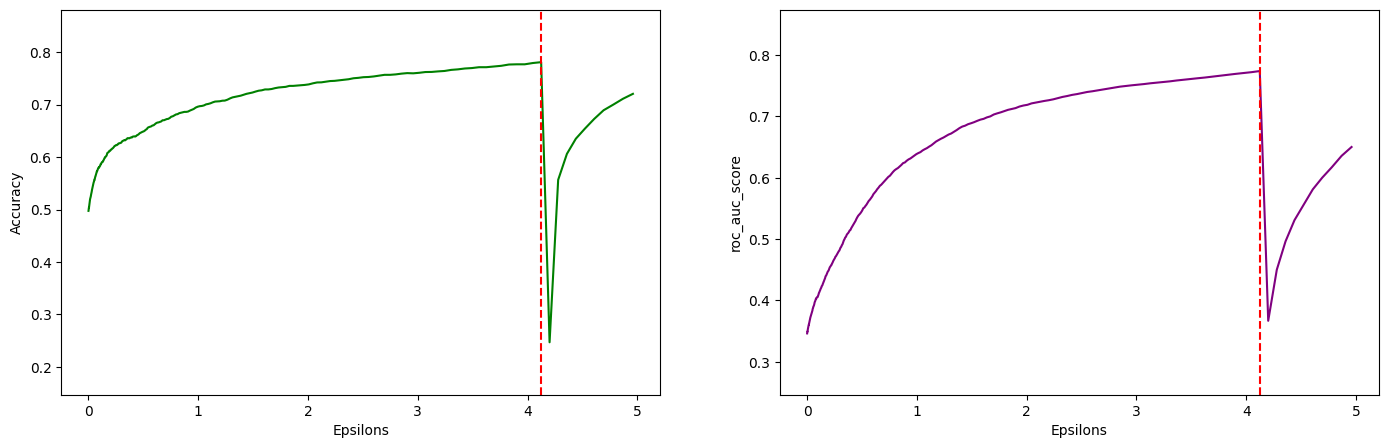

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.plot(epsilons5, acc_list, color='green')
ax1.set_ylim([min(acc_list) - 0.1, max(acc_list) + 0.1])
ax1.axvline(x=e_optimo, linestyle = '--', color='red')
ax1.set_xlabel('Epsilons')
ax1.set_ylabel('Accuracy')

ax2.plot(epsilons5, auc_list, color='purple')
ax2.set_ylim([min(auc_list) - 0.1, max(auc_list) + 0.1])
ax2.axvline(x=e_optimo, linestyle = '--', color='red')
ax2.set_xlabel('Epsilons')
ax2.set_ylabel('roc_auc_score');

Haciendo par de filtros se puede encontrar un $\epsilon$ óptimo tal que el accuracy y el auc del la Regresión Logística se maximicen en el intervalo entre 0.1 y 5. Como se puede ver en los gráficos anteriores el épsilon óptimo es $\epsilon$ = 4.12 aproximadamente.